In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict
load_dotenv()
model=ChatOpenAI()


In [3]:

#define the state
class BlogState(TypedDict):
    topic:str
    outline:str
    blog:str


In [4]:
def create_outline(state:BlogState)->BlogState:
    #fetch title, call llm to get outline, update the blog of the state
    topic=state['topic']
    prompt=f'create a outline for the topic:{topic}'
    state['outline']=model.invoke(prompt).content
    return state


In [5]:
def create_blog(state:BlogState)->BlogState:
    #fetch title, call llm to get outline, update the blog of the state
    topic=state['topic']
    outline=state['outline']
    prompt=f'create a detailed blog for the topic:{topic}using the followint outline \n {outline}'
    state['blog']=model.invoke(prompt).content
    return state


In [6]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow=graph.compile()
initial_state={'topic':"BMW"}
final_state=workflow.invoke(initial_state)
print(final_state['outline'])
print(final_state['blog'])


I. Introduction
   A. Brief history of BMW
   B. Overview of BMW's reputation and popularity 

II. BMW's product line
   A. Cars
      1. Sedans
      2. SUVs
      3. Electric vehicles
   B. Motorcycles
   C. Performance vehicles (such as the M series)

III. BMW's innovative technology and features
   A. Connected drive and infotainment systems
   B. Advanced driver assistance systems
   C. Efficient dynamics and sustainability initiatives

IV. BMW's global presence and market share
   A. Sales figures by region
   B. Competition with other luxury automakers

V. BMW's brand image and marketing strategies
   A. Target demographic
   B. Sponsorships and partnerships
   C. Advertising campaigns

VI. Challenges and controversies faced by BMW
   A. Recalls and quality control issues
   B. Environmental concerns
   C. Impact of global market trends on the automotive industry

VII. Conclusion
   A. Summary of key points
   B. Future outlook for BMW in the automotive industry.

I. Introductio

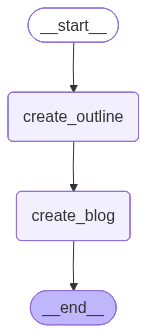

In [7]:
graph.compile()